In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from scipy.stats import norm


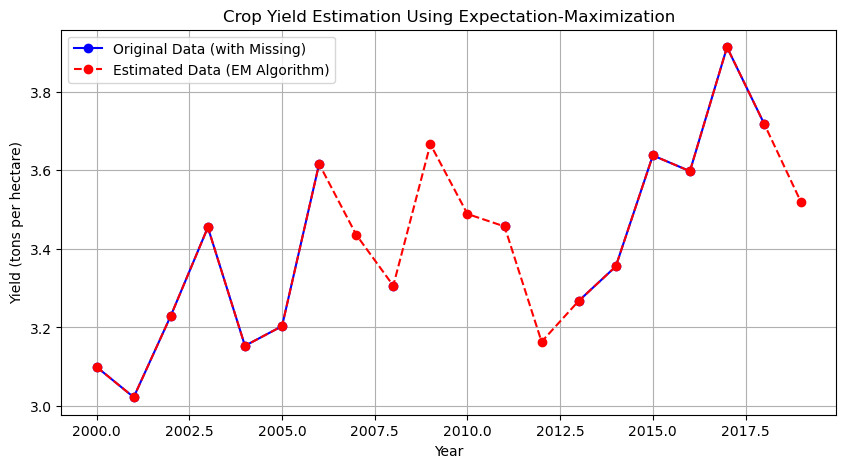

In [10]:
np.random.seed(42)

# Generate synthetic wheat yield data (tons per hectare)
years = np.arange(2000, 2020)
yields = 3 + 0.05 * (years - 2000) + np.random.normal(0, 0.2, len(years))  # Upward trend with noise

# Introduce missing values (simulate missing data)
missing_indices = np.random.choice(len(years), size=5, replace=False)
yields[missing_indices] = np.nan

# Create DataFrame
data = pd.DataFrame({'Year': years, 'Yield': yields})

# Display data

def expectation_maximization(data, max_iter=10, tol=1e-3):
    # Initial imputation using mean
    imp = SimpleImputer(strategy='mean')
    data_filled = imp.fit_transform(data.reshape(-1, 1)).flatten()
    
    for _ in range(max_iter):
        # E-step: Estimate missing values using a normal distribution
        mu, sigma = np.mean(data_filled), np.std(data_filled)
        expected_values = norm(loc=mu, scale=sigma).rvs(len(data))

        # Replace NaNs with new estimates
        new_data = data.copy()
        new_data[np.isnan(data)] = expected_values[np.isnan(data)]

        # Convergence check
        if np.linalg.norm(new_data - data_filled) < tol:
            break
        
        data_filled = new_data

    return data_filled

# Apply EM to estimate missing values
estimated_yields = expectation_maximization(yields)

# Add estimated values back to DataFrame
data['Estimated_Yield'] = estimated_yields

# Display results
plt.figure(figsize=(10,5))
plt.plot(years, yields, 'bo-', label="Original Data (with Missing)")
plt.plot(years, estimated_yields, 'ro--', label="Estimated Data (EM Algorithm)")
plt.xlabel("Year")
plt.ylabel("Yield (tons per hectare)")
plt.title("Crop Yield Estimation Using Expectation-Maximization")
plt.legend()
plt.grid()
plt.savefig("crop_yield_estimation.png")
plt.show()


In [12]:
df = pd.read_csv("/Users/kylejonespatricia/Downloads/FAOSTAT_data_en_2-1-2025.csv")

In [14]:
df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,1343,Apricots,1961,1961,kg/ha,6639.0,E,Estimated value,NaN
1,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,1343,Apricots,1962,1962,kg/ha,6639.0,E,Estimated value,NaN
2,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,1343,Apricots,1963,1963,kg/ha,6639.0,E,Estimated value,NaN
3,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,1343,Apricots,1964,1964,kg/ha,7686.3,E,Estimated value,NaN
4,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,1343,Apricots,1965,1965,kg/ha,8081.9,E,Estimated value,NaN


In [ ]:
data = pd.DataFrame(df,{'Year': Year, 'Yield': Value})

In [4]:
! pip install ace_tools

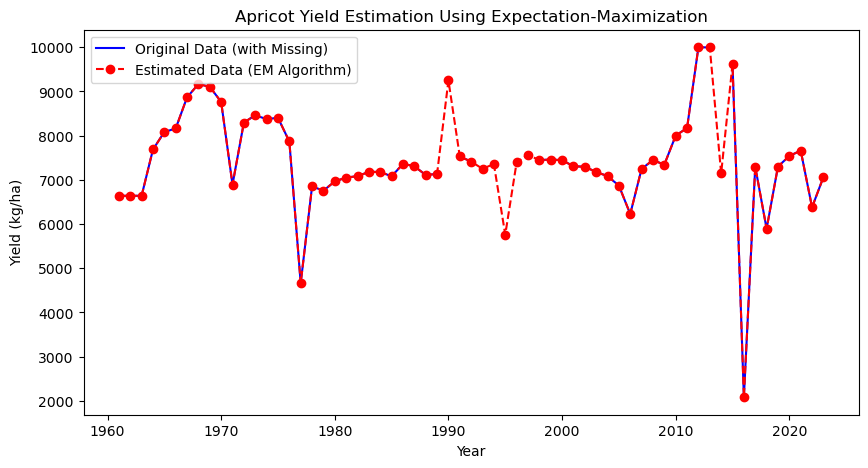

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from scipy.stats import norm

# Load the dataset
file_path = "/Users/kylejonespatricia/Downloads/Apricot_Yield_with_Missing_Values.csv"
df = pd.read_csv(file_path)

# Filter dataset for Apricots in Afghanistan
df_filtered = df[['Year', 'Value']].sort_values(by='Year')

# Function to apply Expectation-Maximization for missing data estimation
def expectation_maximization(data, max_iter=10, tol=1e-3):
    # Initial imputation using mean
    imp = SimpleImputer(strategy='mean')
    data_filled = imp.fit_transform(data.reshape(-1, 1)).flatten()
    
    for _ in range(max_iter):
        # E-step: Estimate missing values using a normal distribution
        mu, sigma = np.mean(data_filled), np.std(data_filled)
        expected_values = norm(loc=mu, scale=sigma).rvs(len(data))

        # Replace NaNs with new estimates
        new_data = data.copy()
        new_data[np.isnan(data)] = expected_values[np.isnan(data)]

        # Convergence check
        if np.linalg.norm(new_data - data_filled) < tol:
            break
        
        data_filled = new_data

    return data_filled

# Apply EM algorithm to estimate missing values
df_filtered['Estimated_Value'] = expectation_maximization(df_filtered['Value'].values)

# Plot the original and estimated values
plt.figure(figsize=(10,5))
plt.plot(df_filtered['Year'], df_filtered['Value'], 'b', label="Original Data (with Missing)")
plt.plot(df_filtered['Year'], df_filtered['Estimated_Value'], 'ro--', label="Estimated Data (EM Algorithm)")
plt.xlabel("Year")
plt.ylabel("Yield (kg/ha)")
plt.title("Apricot Yield Estimation Using Expectation-Maximization")
plt.legend()
plt.savefig("apricot_yield_em.png")
plt.show()
